In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib
from sklearn.preprocessing import LabelEncoder



In [5]:
df1 = pd.read_csv("C:\\Users\\Usuario\\Downloads\\Prediccion de ventas\\car_prices.csv")

In [6]:
df1

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558832,2015,Kia,K900,Luxury,Sedan,NaN,knalw4d4xf6019304,in,45.0,18255.0,silver,black,avis corporation,35300.0,33000.0,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


# Aquí dejo una descripción de cada columna y lo que representa en este dataset de ventas de autos:

year: Año del modelo del vehículo. Indica el año en que se fabricó el vehículo y puede ayudar a evaluar su depreciación y valor en el mercado.

make: Marca del vehículo (ej. Kia, BMW). Este dato permite agrupar las ventas por marca y observar tendencias en el mercado.

model: Modelo específico del vehículo dentro de cada marca (ej. Sorento, 3 Series). Ayuda a identificar modelos con mayor o menor demanda.

trim: Variante o versión específica del modelo (ej. LX, 328i SULEV). Las variaciones de trim incluyen características y detalles que afectan el precio de venta y la preferencia del consumidor.

body: Tipo de carrocería del vehículo (ej. SUV, Sedan). Este dato permite observar las preferencias de los consumidores por tipos de carrocería y su impacto en el precio.

transmission: Tipo de transmisión del vehículo (ej. automático, manual). La transmisión es un factor relevante para ciertos mercados y consumidores.

vin: Número de Identificación del Vehículo (Vehicle Identification Number). Es un identificador único para cada vehículo y se utiliza para identificar registros individuales.

state: Estado (abreviado) en el que se vendió el vehículo. Permite analizar patrones de ventas por ubicación geográfica.

condition: Condición del vehículo, medida en una escala que puede ir de 0 a 50, siendo 50 la mejor condición. Indica el estado general del vehículo y puede influir en el precio de venta.

odometer: Kilometraje del vehículo (en millas). El kilometraje es un indicador del uso y desgaste del vehículo y es crucial para evaluar su valor.

color: Color exterior del vehículo. Puede influir en la demanda de ciertos vehículos según las preferencias del consumidor.

interior: Color o material del interior del vehículo. Afecta el atractivo del vehículo para los compradores y puede impactar el precio de venta.

seller: Nombre del vendedor o empresa que vendió el vehículo. Permite identificar patrones o evaluar la confiabilidad de diferentes vendedores.

mmr: Manheim Market Report (MMR), una referencia del valor de mercado del vehículo basada en subastas. Es una medida del valor estimado del vehículo en el mercado actual.

sellingprice: Precio de venta real del vehículo. Es la variable objetivo en una predicción de ventas, utilizada para comparar con el MMR y ver qué factores influyen en la variación del precio.

saledate: Fecha y hora en que se vendió el vehículo. Ayuda a identificar patrones estacionales o cambios en la demanda a lo largo del tiempo.



In [7]:
# Elimino las columnas que no sean relevantes para el desarrollo del modelo.

df1 = df1.drop(columns=["vin", "saledate", "seller","transmission"])

In [8]:
df1

,year,make,model,trim,body,state,condition,odometer,color,interior,mmr,sellingprice
0,2015,Kia,Sorento,LX,SUV,ca,5.0,16639.0,white,black,20500.0,21500.0
1,2015,Kia,Sorento,LX,SUV,ca,5.0,9393.0,white,beige,20800.0,21500.0
2,2014,BMW,3 Series,328i SULEV,Sedan,ca,45.0,1331.0,gray,black,31900.0,30000.0
3,2015,Volvo,S60,T5,Sedan,ca,41.0,14282.0,white,black,27500.0,27750.0
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,ca,43.0,2641.0,gray,black,66000.0,67000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
558832,2015,Kia,K900,Luxury,Sedan,in,45.0,18255.0,silver,black,35300.0,33000.0
558833,2012,Ram,2500,Power Wagon,Crew Cab,wa,5.0,54393.0,white,black,30200.0,30800.0
558834,2012,BMW,X5,xDrive35d,SUV,ca,48.0,50561.0,black,black,29800.0,34000.0
558835,2015,Nissan,Altima,2.5 S,sedan,ga,38.0,16658.0,white,black,15100.0,11100.0


In [19]:
df1["mmr"].unique()

array([ 20500.,  20800.,  31900., ..., 182000., 119000., 164000.])

In [53]:
# Tratamiento de valores faltantes
# Imputar valores faltantes con la moda (valor más frecuente)

df1['make'].fillna(df1['make'].mode()[0], inplace=True)
df1['model'].fillna(df1['model'].mode()[0], inplace=True)
df1['trim'].fillna(df1['trim'].mode()[0], inplace=True)
df1['body'].fillna(df1['body'].mode()[0], inplace=True)
df1['condition'].fillna(df1['condition'].median(), inplace=True)
df1['odometer'].fillna(df1['odometer'].median(), inplace=True)
df1['color'].fillna(df1['color'].mode()[0], inplace=True)
df1['interior'].fillna(df1['interior'].mode()[0], inplace=True)
df1['mmr'].fillna(df1['mmr'].median(), inplace=True)

# Las filas con valores nulos en sellingprice deben eliminarse

df1 = df1.dropna(subset=['sellingprice'])

C:\Users\Usuario\AppData\Local\Temp\ipykernel_12356\4073070109.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['make'].fillna(df1['make'].mode()[0], inplace=True)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_12356\4073070109.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

In [54]:
# Corroboramos que el dataset no tenga ningun valor nulo. 

df1.isna().sum()

year            0
make            0
model           0
trim            0
body            0
state           0
condition       0
odometer        0
color           0
interior        0
mmr             0
sellingprice    0
dtype: int64

In [55]:
df1

,year,make,model,trim,body,state,condition,odometer,color,interior,mmr,sellingprice
0,2015,Kia,Sorento,LX,SUV,ca,5.0,16639.0,white,black,20500.0,21500.0
1,2015,Kia,Sorento,LX,SUV,ca,5.0,9393.0,white,beige,20800.0,21500.0
2,2014,BMW,3 Series,328i SULEV,Sedan,ca,45.0,1331.0,gray,black,31900.0,30000.0
3,2015,Volvo,S60,T5,Sedan,ca,41.0,14282.0,white,black,27500.0,27750.0
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,ca,43.0,2641.0,gray,black,66000.0,67000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
558832,2015,Kia,K900,Luxury,Sedan,in,45.0,18255.0,silver,black,35300.0,33000.0
558833,2012,Ram,2500,Power Wagon,Crew Cab,wa,5.0,54393.0,white,black,30200.0,30800.0
558834,2012,BMW,X5,xDrive35d,SUV,ca,48.0,50561.0,black,black,29800.0,34000.0
558835,2015,Nissan,Altima,2.5 S,sedan,ga,38.0,16658.0,white,black,15100.0,11100.0


In [56]:
# Seleccionar columnas categóricas
categorical_columns = ['make', 'model', 'trim', 'body', 'color', 'interior', 'state']

# Crear el codificador y aplicar Target Encoding
target_encoder = ce.TargetEncoder(cols=categorical_columns)
df1[categorical_columns] = target_encoder.fit_transform(df1[categorical_columns], df1['sellingprice'])

C:\Users\Usuario\AppData\Local\Temp\ipykernel_12356\2726638583.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[categorical_columns] = target_encoder.fit_transform(df1[categorical_columns], df1['sellingprice'])


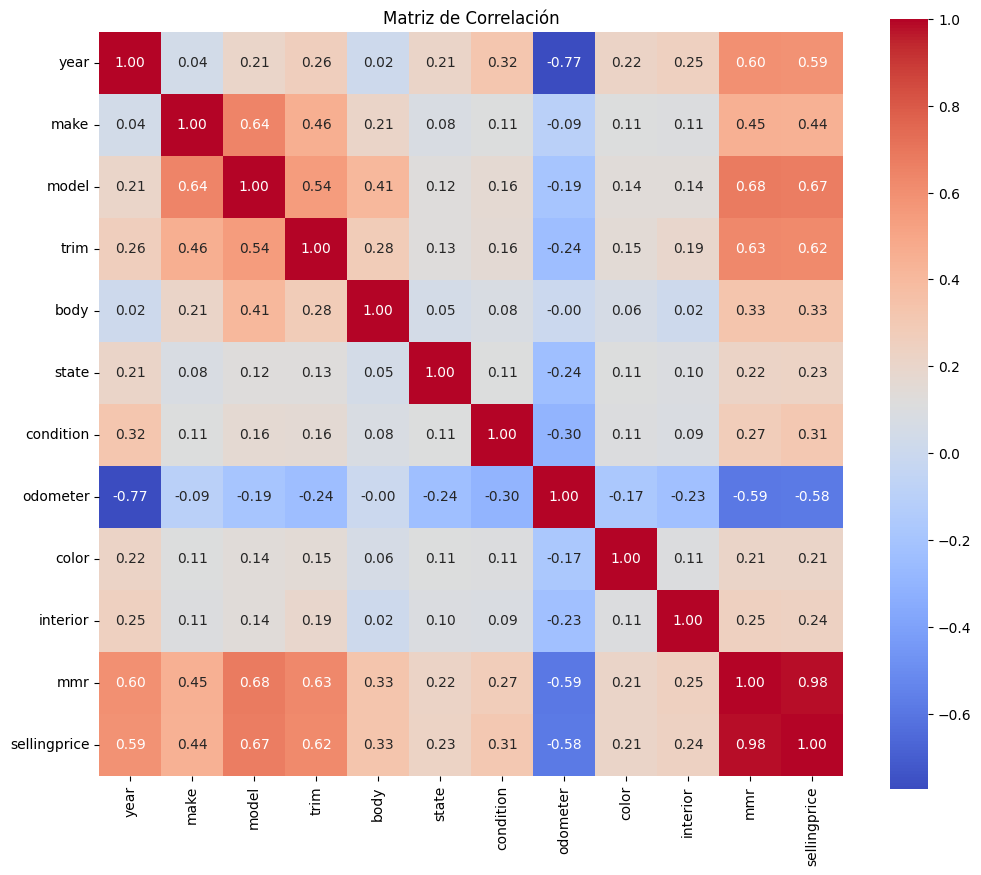

In [58]:
# Calcular la matriz de correlación
correlation_matrix = df1.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Matriz de Correlación')
plt.show()

In [59]:
# 1. Preparación de características (X) y variable objetivo (y)
X = df1.drop('sellingprice', axis=1)
y = df1['sellingprice']

In [60]:
# 2. División de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [61]:
# 3. Crear y entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [62]:
# 4. Realizar predicciones
y_pred = model.predict(X_test)

In [63]:
# 5. Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [64]:
print("Métricas de evaluación del modelo:")
print(f"Error cuadrático medio (MSE): ${mse:,.2f}")
print(f"Raíz del error cuadrático medio (RMSE): ${rmse:,.2f}")
print(f"Error absoluto medio (MAE): ${mae:,.2f}")
print(f"Coeficiente de determinación (R²): {r2:.4f}")

Métricas de evaluación del modelo:
Error cuadrático medio (MSE): $3,131,739.76
Raíz del error cuadrático medio (RMSE): $1,769.67
Error absoluto medio (MAE): $1,052.30
Coeficiente de determinación (R²): 0.9672


In [65]:
# 6. Analizar la importancia de las características
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
feature_importance['Abs_Coefficient'] = abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=False)

print("\nImportancia de las características:")
print(feature_importance)


Importancia de las características:
      Feature  Coefficient  Abs_Coefficient
0        year   -41.186238        41.186238
6   condition    36.239619        36.239619
10        mmr     0.973255         0.973255
5       state     0.039468         0.039468
9    interior     0.012555         0.012555
2       model     0.011203         0.011203
8       color     0.010467         0.010467
1        make    -0.007204         0.007204
4        body     0.007043         0.007043
3        trim     0.005593         0.005593
7    odometer    -0.001245         0.001245


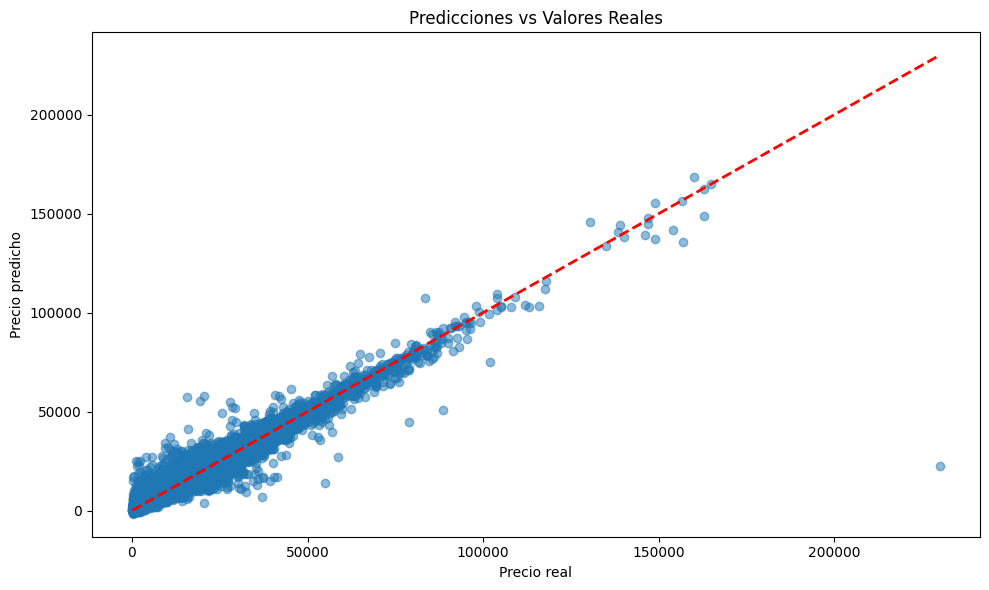

In [66]:
# 7. Visualizar predicciones vs valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Precio real')
plt.ylabel('Precio predicho')
plt.title('Predicciones vs Valores Reales')
plt.tight_layout()
plt.show()

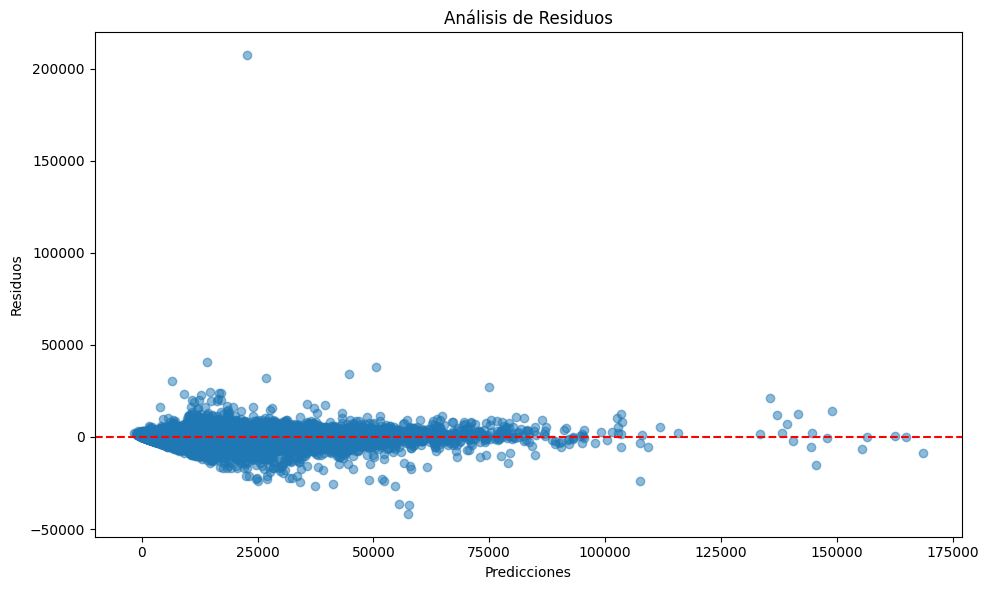

In [67]:
# 8. Análisis de residuos
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Análisis de Residuos')
plt.tight_layout()
plt.show()

In [68]:
# Guardar el modelo en un archivo .pkl
joblib.dump(model, 'modelo_lineal_regresion_car_prices.pkl')

['modelo_lineal_regresion_car_prices.pkl']

In [69]:
# También puedes guardar el target encoder si lo necesitas más tarde para transformar datos nuevos
joblib.dump(target_encoder, 'target_encoder.pkl')

['target_encoder.pkl']